In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_lfw_people
%matplotlib inline

In [97]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
print("image data shape: {}".format(people.images.shape))

image data shape: (3023, 87, 65)


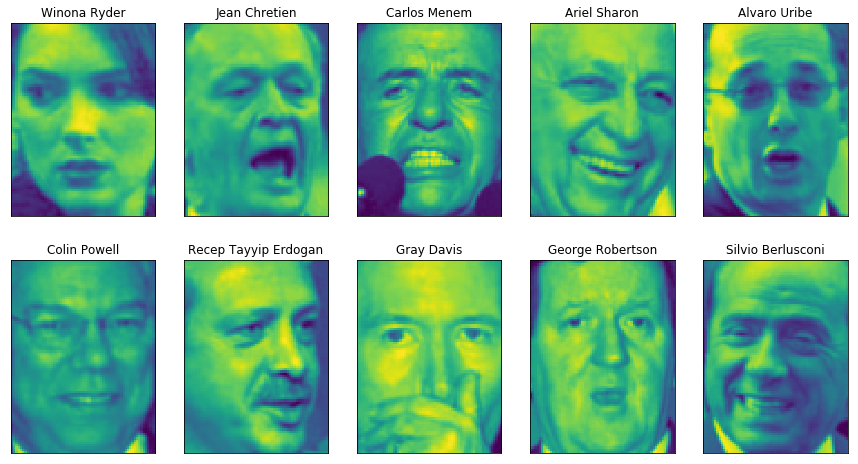

In [98]:
fix, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [99]:
target_person_name = 'George W Bush'
target_person_id = np.where(people.target_names == target_person_name)[0][0]
x_bush = people.data[people.target == target_person_id]
t_bush = people.target[people.target == target_person_id]
x_other = people.data[people.target != target_person_id]
t_other = people.target[people.target != target_person_id]

In [100]:
print("x_bush.shape: {}".format(x_bush.shape))
print("x_other.shape: {}".format(x_other.shape))

x_bush.shape: (530, 5655)
x_other.shape: (2493, 5655)


In [119]:
num_train = 200
x_bush_train = x_bush[0:num_train]
x_bush_test = x_bush[num_train:]
x_other_test = x_other[0:len(x_bush_test)]

In [120]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(x_bush_train)
x_bush_train_pca = pca.transform(x_bush_train)
x_bush_test_pca = pca.transform(x_bush_test)
x_other_test_pca = pca.transform(x_other_test)

In [124]:
gmm = GaussianMixture(n_components=64, covariance_type='diag', random_state=0)
gmm.fit(x_bush_train_pca)
print("train bush score: {:.3f}".format(gmm.score(x_bush_train_pca)))
print("test bush score: {:.3f}".format(gmm.score(x_bush_test_pca)))
print("test other score: {:.3f}".format(gmm.score(x_other_test_pca)))

train bush score: 39.962
test bush score: -137.726
test other score: -155.157


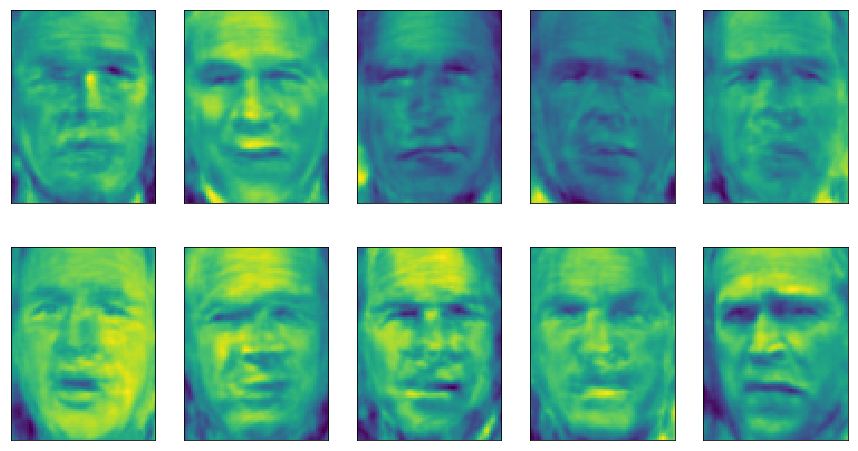

In [125]:
sample = gmm.sample(10)[0]
sample_invert = pca.inverse_transform(sample)
sample_invert_reshape = sample_invert.reshape(10, 87, 65)

fix, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for image, ax in zip(sample_invert_reshape, axes.ravel()):
    ax.imshow(image)